In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix  
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import Ridge
import pydotplus
import graphviz
import os
import warnings
import random
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:\\Users\\liuth\Documents\\Python Scripts\\ThinkfulProjects\Data')

In [3]:
df = pd.read_csv('final.csv')

In [4]:
df.head(5)

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31,35,0
1,1,65.16,male,yes,23,61,0
2,2,40.60,female,no,36,49,0
3,3,38.01,male,yes,47,57,0
4,4,22.32,female,yes,5,39,0


In [5]:
#Creating binary Results
df['card_on_file'] = df['card_on_file'].map(lambda i:1 if i == 'yes' else 0)

In [6]:
df.head(5)

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,0,31,35,0
1,1,65.16,male,1,23,61,0
2,2,40.60,female,0,36,49,0
3,3,38.01,male,1,47,57,0
4,4,22.32,female,1,5,39,0


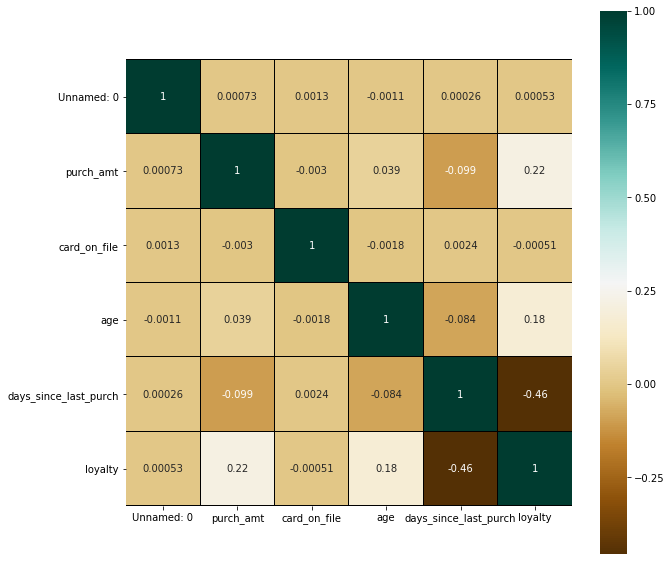

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.1, square=True, cmap = "BrBG", linecolor='black', annot=True, ax=ax)

---

Downsampling

In [8]:
df2 = pd.DataFrame()

In [9]:
df2['card'] = df['card_on_file']
df2['loyal'] = df['loyalty']
df2['age'] = df['age']
df2['purchase'] = df['days_since_last_purch']
df2['amt'] = df['purch_amt']

In [11]:
df_maj = df2[df2.loyal==0]
df_min = df2[df2.loyal==1]

# Downsample majority class 
df_maj_downsampled = resample(df_maj,
                                    replace=True,
                                    n_samples=len(df_min),
                                    random_state=123)
                               
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_maj_downsampled, df_min])

df_downsampled.shape
df_downsampled.loyal.value_counts()

1    20000
0    20000
Name: loyal, dtype: int64

In [13]:
df_train_down,df_test_down= train_test_split(df_downsampled,test_size=0.20)

In [15]:
lr = LogisticRegression()

In [16]:
X = df_train_down[['amt', 'purchase', 'age', 'card']] 
Y = df_train_down['loyal'] 

# Use GS-CV to see which alpha level is best.
parameters = {
             'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

lr_grid = GridSearchCV(lr, parameters, cv=5, verbose=1) 

#Fit the logistic regression 
lr_grid.fit(X, Y)

#return best parameters and best score
print('Best parameters:')
print(lr_grid.best_params_)
print('Best Score:')
print(lr_grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'C': 100}
Best Score:
0.79528125


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    2.2s finished


In [18]:
Xtest = df_test_down[['amt', 'purchase', 'age', 'card']] 
Ytest = df_test_down['loyal']

# Use GS-CV to see which alpha level is best.
parameters = {
             'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

lr_grid = GridSearchCV(lr, parameters, cv=5, verbose=1) 

#Fit the logistic regression 
lr_grid.fit(Xtest, Ytest)

#return best parameters and best score
print('Best parameters:')
print(lr_grid.best_params_)
print('Best Score:')
print(lr_grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'C': 1}
Best Score:
0.797625


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


In [19]:
lr = LogisticRegression(C=100)

# Fit the model.
fit = lr.fit(X, Y)
fit2 = lr.fit(Xtest, Ytest)

# Display.
print('Coefficients Train')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn2 = lr.fit(X, Y) #done for estimation

print('Coefficients Test')
print(fit2.coef_)
print(fit2.intercept_)
pred_y_sklearn = lr.predict(Xtest) #predict what is going on for the estimation

print('\n Accuracy of PASS status')
print(pd.crosstab(pred_y_sklearn, Ytest))

print('\n Percentage accuracy')
print(lr.score(X, Y))

print('\n Percentage accuracy')
print(lr.score(Xtest, Ytest))

#class imbalance produces high accuracy, revisit after down sampling.

cross_val_score(lr, Xtest, Ytest, cv=5)

Coefficients Train
[[ 0.0305198  -0.1064793   0.04970551 -0.05327602]]
[2.44409423]
Coefficients Test
[[ 0.03010147 -0.10395507  0.04668797  0.02742843]]
[2.40480152]

 Accuracy of PASS status
loyal     0     1
row_0            
0      3190   758
1       856  3196

 Percentage accuracy
0.79528125

 Percentage accuracy
0.79825


array([0.81011868, 0.81      , 0.799375  , 0.77      , 0.79674797])

---

Gradient Boosting

In [22]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X, Y)

predict_train = clf.predict(X)
predict_test = clf.predict(Xtest)

# Accuracy tables.
table_train = pd.crosstab(Y, predict_train, margins=True)
table_test = pd.crosstab(Ytest, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.1088125
Percent Type II errors: 0.0896875

Test set accuracy:
Percent Type I errors: 0.11475
Percent Type II errors: 0.09


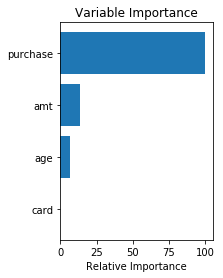

In [23]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [24]:
lr = LogisticRegression()

In [30]:
X = df_train_down[['amt', 'purchase', 'age']] 
Y = df_train_down['loyal'] 

# Use GS-CV to see which alpha level is best.
parameters = {
             'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

lr_grid = GridSearchCV(lr, parameters, cv=5, verbose=1) 

#Fit the logistic regression 
lr_grid.fit(X, Y)

#return best parameters and best score
print('Best parameters:')
print(lr_grid.best_params_)
print('Best Score:')
print(lr_grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'C': 1}
Best Score:
0.79534375


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    1.6s finished


In [31]:
Xtest = df_test_down[['amt', 'purchase', 'age']] 
Ytest = df_test_down['loyal']

# Use GS-CV to see which alpha level is best.
parameters = {
             'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,10000,100000,100000000]}

lr_grid = GridSearchCV(lr, parameters, cv=5, verbose=1) 

#Fit the logistic regression 
lr_grid.fit(Xtest, Ytest)

#return best parameters and best score
print('Best parameters:')
print(lr_grid.best_params_)
print('Best Score:')
print(lr_grid.best_score_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters:
{'C': 1}
Best Score:
0.798375


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.4s finished


In [32]:
lr = LogisticRegression(C=1)

# Fit the model.
fit = lr.fit(X, Y)
fit2 = lr.fit(Xtest, Ytest)

# Display.
print('Coefficients Train')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn2 = lr.fit(X, Y) #done for estimation

print('Coefficients Test')
print(fit2.coef_)
print(fit2.intercept_)
pred_y_sklearn = lr.predict(Xtest) #predict what is going on for the estimation

print('\n Accuracy of PASS status')
print(pd.crosstab(pred_y_sklearn, Ytest))

print('\n Percentage accuracy')
print(lr.score(X, Y))

print('\n Percentage accuracy')
print(lr.score(Xtest, Ytest))

#class imbalance produces high accuracy, revisit after down sampling.

cross_val_score(lr, Xtest, Ytest, cv=5)

Coefficients Train
[[ 0.03082144 -0.10569658  0.05038562]]
[2.34353636]
Coefficients Test
[[ 0.0301126  -0.1039173   0.04672281]]
[2.41518423]

 Accuracy of PASS status
loyal     0     1
row_0            
0      3190   757
1       856  3197

 Percentage accuracy
0.79534375

 Percentage accuracy
0.798375


array([0.81074329, 0.810625  , 0.799375  , 0.77125   , 0.79987492])

In [36]:
dtc = DecisionTreeClassifier(criterion ='entropy', min_samples_split=2, random_state=123456)

dtc_params = [{'max_features': [.25],
              'max_depth': [1, 2, 4, 6, 8]}]


# # Search for the best paramters. 
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, n_jobs=1)

# Fit the grid and obtain results
dts1 = dtc_grid.fit(X, Y)
dts2 = dtc_grid.predict(X)

# Return best parameters and best score
print('Best parameters Train:')
print(dts1.best_params_)
print('Best Score Train:')
print(dts1.best_score_)

#print('Best Score Test:')
#print(dts2.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters Train:
{'max_depth': 6, 'max_features': 0.25}
Best Score Train:
0.7840625


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


In [37]:
dtc = RandomForestClassifier(criterion ='entropy', min_samples_split=2, random_state=123456)

dtc_params = [{'max_features': [.25],
              'max_depth': [1, 2, 4, 6, 8]}]


# # Search for the best paramters. 
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, verbose=1, n_jobs=1)

# Fit the grid and obtain results
dts1 = dtc_grid.fit(X, Y)
dts2 = dtc_grid.predict(X)

# Return best parameters and best score
print('Best parameters Train:')
print(dts1.best_params_)
print('Best Score Train:')
print(dts1.best_score_)

#print('Best Score Test:')
#print(dts2.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameters Train:
{'max_depth': 8, 'max_features': 0.25}
Best Score Train:
0.79234375


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.8s finished
